In [1]:
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model



In [2]:
import tensorflow as tf

fully connected neural network

In [3]:
inputs = Input((1,))
X1 = Dense(32, activation='relu')(inputs)
X2 = Dense(64,activation = 'relu')(X1)
X =  Dense(128, activation = 'relu')(X2)
outputs = Dense(1)(X)

model = Model(inputs,outputs)
model.compile('adam', loss = 'mse', metrics= tf.keras.metrics.R2Score(name="accuracy"))
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# x = np.random.randint(-20,21, size = 5000,dtype=int)
x  = np.arange(-20,20,0.1)
y = 5*(x**3)-8*(x**2) -7*x +1

print(x)
print(y)


[-2.00000000e+01 -1.99000000e+01 -1.98000000e+01 -1.97000000e+01
 -1.96000000e+01 -1.95000000e+01 -1.94000000e+01 -1.93000000e+01
 -1.92000000e+01 -1.91000000e+01 -1.90000000e+01 -1.89000000e+01
 -1.88000000e+01 -1.87000000e+01 -1.86000000e+01 -1.85000000e+01
 -1.84000000e+01 -1.83000000e+01 -1.82000000e+01 -1.81000000e+01
 -1.80000000e+01 -1.79000000e+01 -1.78000000e+01 -1.77000000e+01
 -1.76000000e+01 -1.75000000e+01 -1.74000000e+01 -1.73000000e+01
 -1.72000000e+01 -1.71000000e+01 -1.70000000e+01 -1.69000000e+01
 -1.68000000e+01 -1.67000000e+01 -1.66000000e+01 -1.65000000e+01
 -1.64000000e+01 -1.63000000e+01 -1.62000000e+01 -1.61000000e+01
 -1.60000000e+01 -1.59000000e+01 -1.58000000e+01 -1.57000000e+01
 -1.56000000e+01 -1.55000000e+01 -1.54000000e+01 -1.53000000e+01
 -1.52000000e+01 -1.51000000e+01 -1.50000000e+01 -1.49000000e+01
 -1.48000000e+01 -1.47000000e+01 -1.46000000e+01 -1.45000000e+01
 -1.44000000e+01 -1.43000000e+01 -1.42000000e+01 -1.41000000e+01
 -1.40000000e+01 -1.39000

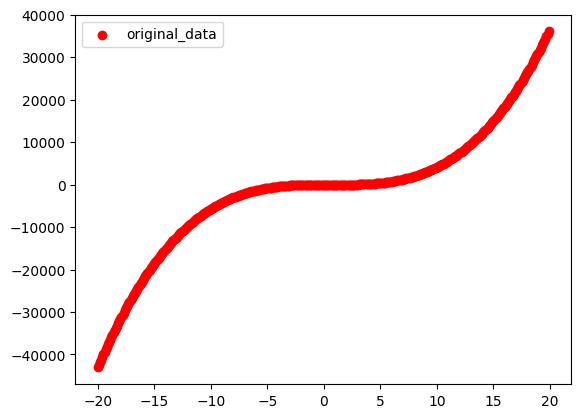

In [7]:
plt.scatter(x,y, color="red", label="original_data")
plt.legend()

In [10]:
total_cnt = x.shape[0]
total_cnt

ind = np.random.permutation(total_cnt)
x = x[ind]
y = y[ind]

print(x)

[ 4.50000000e+00  1.37000000e+01  2.50000000e+00  4.40000000e+00
  1.96000000e+01 -1.20000000e+01 -5.70000000e+00 -3.30000000e+00
 -5.50000000e+00  7.60000000e+00  6.50000000e+00  2.00000000e-01
 -2.00000000e+00 -9.60000000e+00 -4.20000000e+00 -1.11000000e+01
 -1.16000000e+01 -1.40000000e+00 -1.66000000e+01  8.60000000e+00
  7.50000000e+00  1.35000000e+01 -1.27000000e+01  1.10000000e+00
  1.00000000e+00 -3.60000000e+00 -8.20000000e+00  1.52000000e+01
  1.27000000e+01 -1.60000000e+01  1.77000000e+01  1.22000000e+01
 -6.60000000e+00  3.60000000e+00  7.10000000e+00  4.00000000e+00
  1.36000000e+01  1.08000000e+01  1.59000000e+01  2.40000000e+00
 -1.68000000e+01  9.80000000e+00  1.28000000e+01  2.80000000e+00
 -1.40000000e+01  1.56000000e+01  8.30000000e+00  8.80000000e+00
 -1.94000000e+01 -1.38000000e+01  1.79000000e+01  5.20000000e+00
  7.90000000e+00  1.06000000e+01  5.50000000e+00 -8.70000000e+00
 -7.80000000e+00  4.80000000e+00  1.64000000e+01 -8.50000000e+00
 -4.10000000e+00  1.46000

In [31]:
xmn = np.min(x)
xmx = np.max(x)
ymn = np.min(y)
ymx = np.max(y)

x = 2*((x-xmn)/(xmx-xmn))-1
y = 2*((y-ymn)/(ymx-ymn))-1

In [32]:
size = (len(x))
xtrain = x[:int(size*0.9)]
ytrain = y[:int(size*0.9)]

xval = x[int(size*0.9):int(size*.95)]
yval = y[int(size*0.9):int(size*.95)]

xtest = x[int(size*.95): ]
ytest = y[int(size*.95):]


In [33]:
history = model.fit(xtrain, ytrain, epochs=20,validation_data = (xval, yval))
history

Epoch 1/20
141/141 [==============================] - 2s 5ms/step - loss: 0.0166 - accuracy: 0.8987 - val_loss: 0.0018 - val_accuracy: 0.9877
Epoch 2/20
141/141 [==============================] - 0s 3ms/step - loss: 6.5376e-04 - accuracy: 0.9960 - val_loss: 1.8585e-04 - val_accuracy: 0.9987
Epoch 3/20
141/141 [==============================] - 1s 4ms/step - loss: 1.2265e-04 - accuracy: 0.9993 - val_loss: 1.1275e-04 - val_accuracy: 0.9992
Epoch 4/20
141/141 [==============================] - 1s 5ms/step - loss: 4.8115e-05 - accuracy: 0.9997 - val_loss: 2.7267e-05 - val_accuracy: 0.9998
Epoch 5/20
141/141 [==============================] - 1s 5ms/step - loss: 2.2441e-05 - accuracy: 0.9999 - val_loss: 1.2351e-05 - val_accuracy: 0.9999
Epoch 6/20
141/141 [==============================] - 1s 5ms/step - loss: 1.2037e-05 - accuracy: 0.9999 - val_loss: 7.1677e-06 - val_accuracy: 1.0000
Epoch 7/20
141/141 [==============================] - 1s 4ms/step - loss: 8.4504e-06 - accuracy: 0.9999 - va

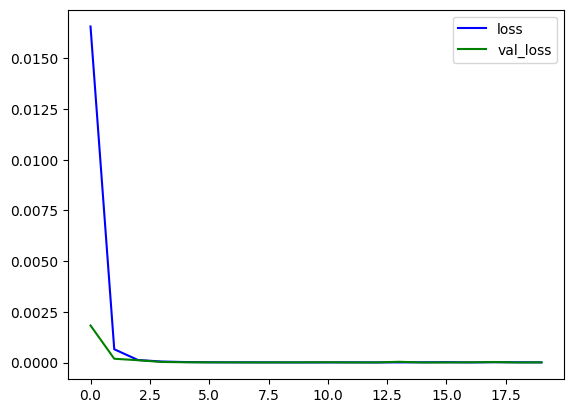

In [34]:
plt.plot(history.history['loss'], color="blue", label="loss")
plt.plot(history.history['val_loss'], color="green", label="val_loss")
plt.legend()

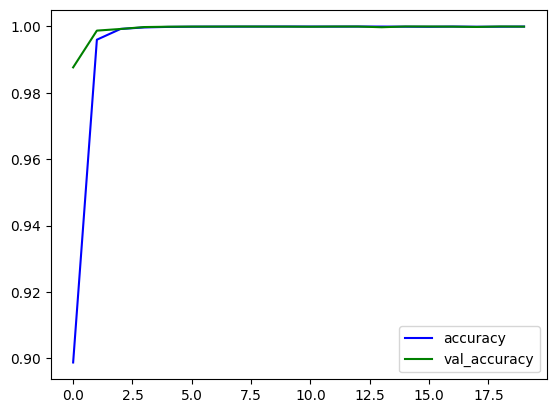

In [35]:
plt.plot(history.history['accuracy'], color="blue", label="accuracy")
plt.plot(history.history['val_accuracy'], color="green",label="val_accuracy")
plt.legend()

In [36]:
y_pred = model.predict(xtest)

8/8 [==============================] - 0s 2ms/step


In [37]:
x_true = (((xtest+1)*(xmx-xmn))/2) + xmn
y_true = (((ytest+1)*(ymx-ymn))/2) + ymn
y_pred_true = (((y_pred+1)*(ymx-ymn))/2) + ymn


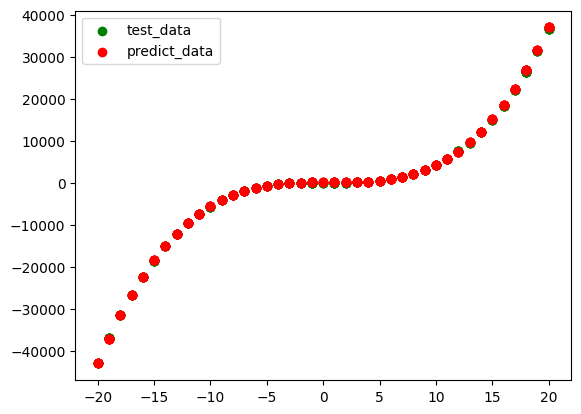

In [38]:
plt.scatter(x_true,y_true,color="green", marker='o', label = 'test_data')
plt.scatter(x_true,y_pred_true,color="red", marker='o', label = 'predict_data')
plt.legend()
plt.show()
# plt.plot(xtest,y_pred, color="blue")